# Imports

In [1]:
import numpy as np
import tensorflow as tf
import pandas as pd
import keras
import matplotlib.pyplot as plt
from pathlib import Path

Using TensorFlow backend.


## Import Data

In [2]:
data_train = pd.read_csv('../data/play/play_train_rounds_merged.csv', header=None, nrows=20000000)
data_test = pd.read_csv('../data/play/play_test_rounds_merged.csv', header=None, nrows=20000000)

cards = [
# Diamonds
'DA','DK','DQ','DJ','D10','D9','D8','D7','D6',
# Hearts
'HA','HK','HQ','HJ','H10','H9','H8','H7','H6',
# Spades
'SA','SK','SQ','SJ','S10','S9','S8','S7','S6',
# Clubs
'CA','CK','CQ','CJ','C10','C9','C8','C7','C6'
]

player = ['P0','P1','P2','P3']
trump = ['D','H','S','C','O','U']
played_card = ['PlayedCard']

In [3]:
# data_train
data_train.columns = cards + cards + player + trump + played_card
data_train.head()

,DA,DK,DQ,DJ,D10,D9,D8,D7,D6,HA,...,P1,P2,P3,D,H,S,C,O,U,PlayedCard
0,0,0,0,0,1,1,0,0,1,0,...,0,1,0,0,0,0,1,0,0,8
1,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,1,17
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,4
3,0,0,0,0,1,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,4
4,1,0,0,0,0,0,0,1,0,1,...,0,0,1,0,0,0,1,0,0,28


In [4]:
# data_test
data_test.columns = cards + cards + player + trump + played_card
data_test.head()

,DA,DK,DQ,DJ,D10,D9,D8,D7,D6,HA,...,P1,P2,P3,D,H,S,C,O,U,PlayedCard
0,0,0,0,0,1,0,0,0,0,1,...,1,0,0,1,0,0,0,0,0,4
1,1,0,0,0,1,0,1,0,0,0,...,1,0,0,0,0,1,0,0,0,6
2,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,34
3,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,31
4,0,0,0,1,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,30


In [5]:
x_train = data_train.drop('PlayedCard', axis='columns', inplace=False)
# x_train = data_train
x_train.head()

,DA,DK,DQ,DJ,D10,D9,D8,D7,D6,HA,...,P0,P1,P2,P3,D,H,S,C,O,U
0,0,0,0,0,1,1,0,0,1,0,...,0,0,1,0,0,0,0,1,0,0
1,0,0,0,0,0,1,0,0,1,0,...,1,0,0,0,0,0,0,0,0,1
2,0,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
3,0,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
4,1,0,0,0,0,0,0,1,0,1,...,0,0,0,1,0,0,0,1,0,0


In [6]:
x_test = data_test.drop('PlayedCard', axis='columns', inplace=False)
# x_test = data_test
x_test.head()

,DA,DK,DQ,DJ,D10,D9,D8,D7,D6,HA,...,P0,P1,P2,P3,D,H,S,C,O,U
0,0,0,0,0,1,0,0,0,0,1,...,0,1,0,0,1,0,0,0,0,0
1,1,0,0,0,1,0,1,0,0,0,...,0,1,0,0,0,0,1,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
3,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
4,0,0,0,1,0,1,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0


In [7]:
y_train_label = data_train['PlayedCard']
y_train = keras.utils.to_categorical(y_train_label, num_classes=36)

model = keras.Sequential()
model.add(keras.layers.Dense(82, activation='relu', input_shape=[82]))
model.add(keras.layers.Dense(59, activation='relu'))
model.add(keras.layers.Dense(54, activation='relu'))
model.add(keras.layers.Dense(36, activation='softmax'))
model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=100, batch_size=250, shuffle=True)

Epoch 1/100
20000000/20000000 [==============================] - 206s 10us/step - loss: 1.2686 - accuracy: 0.5237
Epoch 2/100
20000000/20000000 [==============================] - 187s 9us/step - loss: 1.0225 - accuracy: 0.5785
Epoch 3/100
20000000/20000000 [==============================] - 187s 9us/step - loss: 0.9685 - accuracy: 0.6028
Epoch 4/100
20000000/20000000 [==============================] - 187s 9us/step - loss: 0.9367 - accuracy: 0.6146
Epoch 5/100
20000000/20000000 [==============================] - 187s 9us/step - loss: 0.9172 - accuracy: 0.6210
Epoch 6/100
20000000/20000000 [==============================] - 187s 9us/step - loss: 0.8961 - accuracy: 0.6284
Epoch 7/100
20000000/20000000 [==============================] - 188s 9us/step - loss: 0.8841 - accuracy: 0.6328
Epoch 8/100
20000000/20000000 [==============================] - 188s 9us/step - loss: 0.8755 - accuracy: 0.6360
Epoch 9/100
20000000/20000000 [==============================] - 188s 9us/step - loss: 0.8676 -

20000000/20000000 [==============================] - 188s 9us/step - loss: 0.7847 - accuracy: 0.6694
Epoch 73/100
20000000/20000000 [==============================] - 188s 9us/step - loss: 0.7841 - accuracy: 0.6695
Epoch 74/100
20000000/20000000 [==============================] - 188s 9us/step - loss: 0.7834 - accuracy: 0.6697
Epoch 75/100
20000000/20000000 [==============================] - 188s 9us/step - loss: 0.7828 - accuracy: 0.6699
Epoch 76/100
20000000/20000000 [==============================] - 188s 9us/step - loss: 0.7821 - accuracy: 0.6701
Epoch 77/100
20000000/20000000 [==============================] - 188s 9us/step - loss: 0.7816 - accuracy: 0.6702
Epoch 78/100
20000000/20000000 [==============================] - 188s 9us/step - loss: 0.7810 - accuracy: 0.6704
Epoch 79/100
20000000/20000000 [==============================] - 187s 9us/step - loss: 0.7804 - accuracy: 0.6705
Epoch 80/100
20000000/20000000 [==============================] - 4831s 242us/step - loss: 0.7799 - a

In [8]:
model.summary()
print(model.get_weights())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 82)                6806      
_________________________________________________________________
dense_2 (Dense)              (None, 59)                4897      
_________________________________________________________________
dense_3 (Dense)              (None, 54)                3240      
_________________________________________________________________
dense_4 (Dense)              (None, 36)                1980      
Total params: 16,923
Trainable params: 16,923
Non-trainable params: 0
_________________________________________________________________
[array([[-0.04592941,  0.76974547, -0.15702651, ...,  0.32578284,
        -0.10145488,  0.01476145],
       [-0.04916858, -0.0274239 , -0.13283147, ..., -0.06494336,
        -0.14245771, -0.01573345],
       [-0.05314158,  0.17820282, -0.14602223, 

Text(0, 0.5, 'loss')

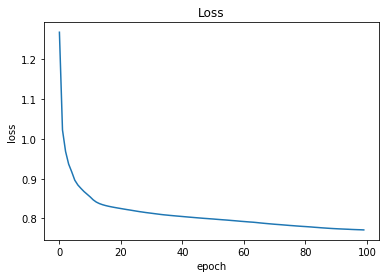

In [9]:
plt.plot(history.history['loss'])
plt.title('Loss')
plt.xlabel('epoch')
plt.ylabel('loss')

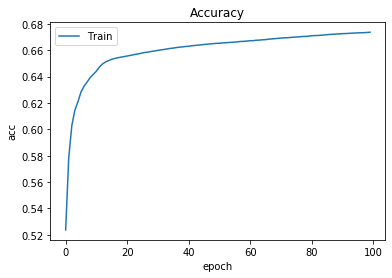

In [10]:
plt.plot(history.history['accuracy'])
# plt.plot(history.history['val_accuracy'])
plt.title('Accuracy')
plt.xlabel('epoch')
plt.ylabel('acc')
plt.legend(['Train', 'Val'], loc='upper left')

In [11]:
history.history['accuracy'][-1]

0.6736505

# Predict

In [12]:
y_pred = model.predict(x_test)

In [13]:
TOTAL_COUNT = len(x_test)
CORRECT_COUNT = 0

for i in range(0,len(y_pred)):    
    predicted_played_card = np.where(y_pred[i] == np.amax(y_pred[i]))[0][0]
    real_played_card = data_test.iloc[i]['PlayedCard']
    
    if int(predicted_played_card) == int(real_played_card):
        CORRECT_COUNT = CORRECT_COUNT + 1

In [14]:
accuracy = (CORRECT_COUNT / TOTAL_COUNT) * 100
print(f'Total Count  : {TOTAL_COUNT}')
print(f'Correct Count: {CORRECT_COUNT}')
print(f'Accuracy     : {accuracy}')

Total Count  : 13111848
Correct Count: 8838259
Accuracy     : 67.40666151712557


### Versions

| Version | CSV  | epoch | Batch size | Layers                                 | Loss   | AccTrain | AccTest |
| ------- | ---- | ----- | ---------- | -------------------------------------- | ------ | -------- | ------- |
| V0      | 10^6 | 100   | 250        | relu(82) relu(59) relu(54) softmax(36) | 0.8936 | 0.6301   | 0.6253  |
| V1      | 2* 10^6 | 100   | 250        | relu(82) relu(59) relu(54) softmax(36) | 0.8309 | 0.6365   | 0.6344  |

# Save model

In [15]:
#Save the model in MlBasedPlayer
version = "V1"

model.save(f'../models/card_prediction_model_{version}.h5')